In [1]:
from Add_data import *  # pandas as pd already imported
import seaborn as sns


In [2]:
d1.info()
d2.info()
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         4158 non-null   object 
 1   Source       4158 non-null   object 
 2   Destination  4158 non-null   object 
 3   Protocol     4158 non-null   object 
 4   Country      4158 non-null   object 
 5   Region       4158 non-null   object 
 6   City         4158 non-null   object 
 7   Org          4158 non-null   object 
 8   Longitude    4158 non-null   float64
 9   Latitude     4158 non-null   float64
 10  Connection   4158 non-null   object 
 11  Length       4158 non-null   int64  
 12  ARTT         4158 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 422.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tim

In [3]:
combined_df = pd.concat([d1, d2, d3], ignore_index=True)
combined_df.head()

,Time,Source,Destination,Protocol,Country,Region,City,Org,Longitude,Latitude,Connection,Length,ARTT
0,2024-08-19 11:45:20,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,21415,64
1,2024-08-19 11:45:20,192.168.1.19,162.249.72.4,UDP,EG,Cairo,Cairo,Etisalat,30.048255,31.233643,ADSL,4278,66
2,2024-08-19 11:45:21,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,485,63
3,2024-08-19 11:45:21,192.168.1.19,162.249.72.4,UDP,EG,Cairo,Cairo,Etisalat,30.048255,31.233643,ADSL,500,66
4,2024-08-19 11:45:22,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,120,63


In [4]:
# Ensure 'Time' is in datetime format
combined_df["Time"] = pd.to_datetime(combined_df["Time"])

# Extract the hour of the day
combined_df["Hour"] = combined_df["Time"].dt.hour


In [5]:
# Count the number of connections per hour
hourly_traffic = combined_df["Hour"].value_counts().sort_index()

# Find the hour with the maximum traffic
max_traffic_hour = hourly_traffic.idxmax()
max_traffic_count = hourly_traffic.max()

print(f"Maximum traffic occurs at {max_traffic_hour}:00 with {max_traffic_count} connections.")


Maximum traffic occurs at 12:00 with 8737 connections.


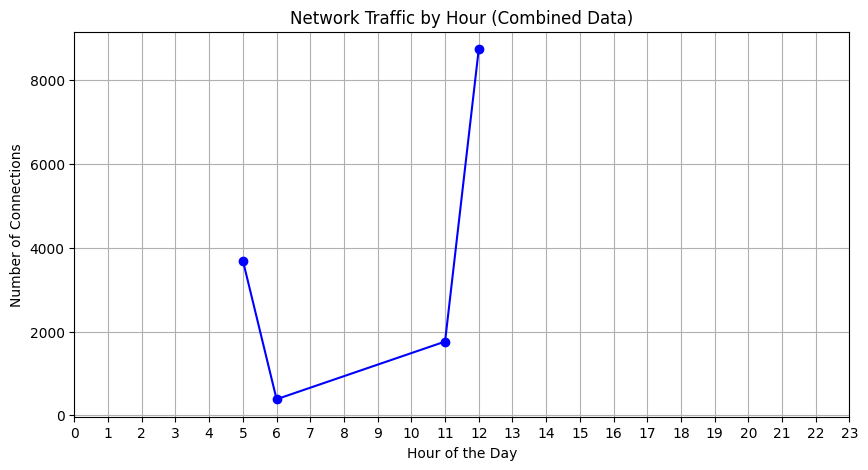

In [6]:
import matplotlib.pyplot as plt

# Plot the traffic count by hour
plt.figure(figsize=(10, 5))
plt.plot(hourly_traffic.index, hourly_traffic.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Connections")
plt.title("Network Traffic by Hour (Combined Data)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


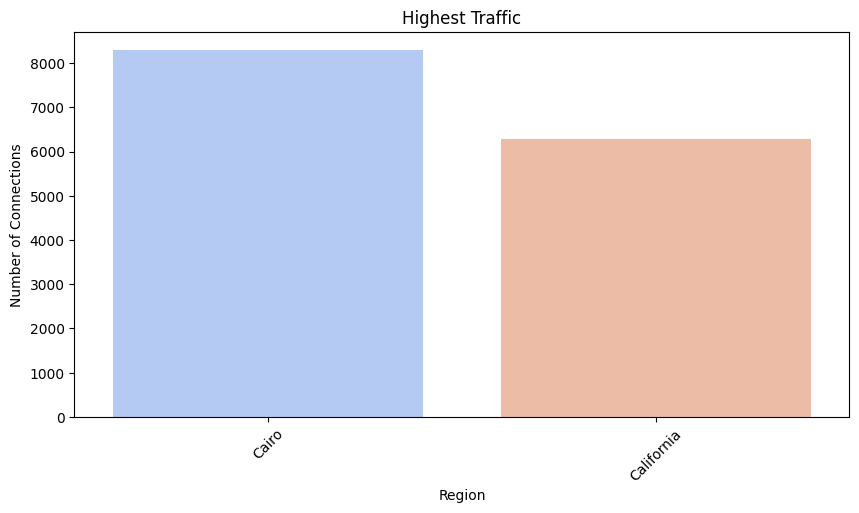

In [7]:
# Count connections per region
region_traffic = combined_df["Region"].value_counts().head(10)  # Top 10 regions

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=region_traffic.index, y=region_traffic.values, hue=region_traffic.index, 
            palette="coolwarm", legend=False)

plt.xlabel("Region")
plt.ylabel("Number of Connections")
plt.title("Highest Traffic")
plt.xticks(rotation=45)
plt.show()


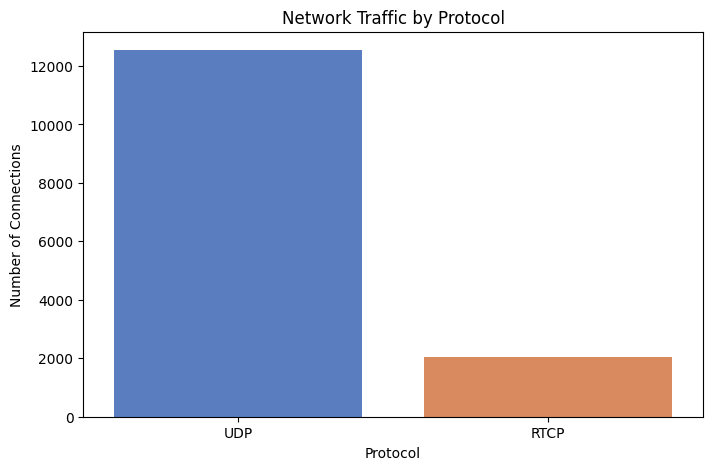

In [8]:
# Count traffic per protocol
protocol_traffic = combined_df["Protocol"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=protocol_traffic.index, y=protocol_traffic.values, 
            hue=protocol_traffic.index, palette="muted", legend=False)
plt.xlabel("Protocol")
plt.ylabel("Number of Connections")
plt.title("Network Traffic by Protocol")
plt.show()


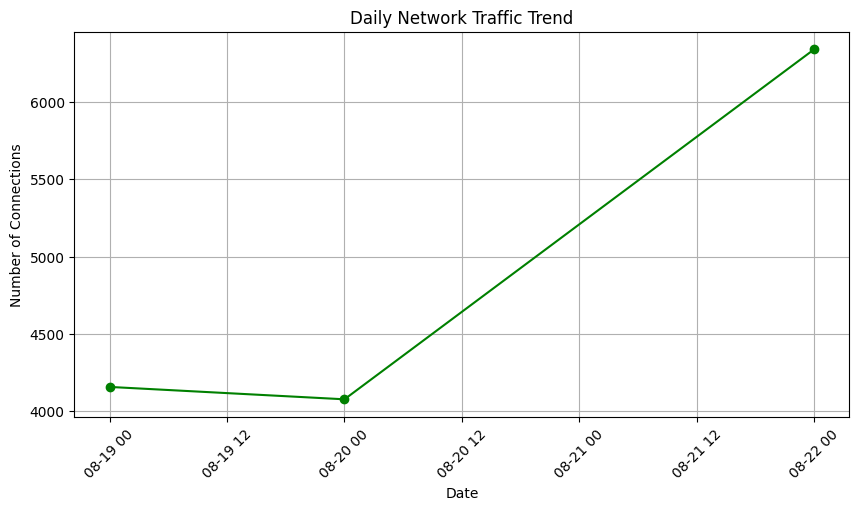

In [9]:
# Ensure 'Time' is in datetime format
combined_df["Time"] = pd.to_datetime(combined_df["Time"])

# Extract date and hour in AM/PM format
combined_df["Date"] = combined_df["Time"].dt.date  # Extract Date
combined_df["Hour_AMPM"] = combined_df["Time"].dt.strftime("%I %p")  # Extract Hour in AM/PM

# Count traffic per day
daily_traffic = combined_df["Date"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_traffic.index, daily_traffic.values, marker="o", linestyle="-", color="g")
plt.xlabel("Date")
plt.ylabel("Number of Connections")
plt.title("Daily Network Traffic Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# here 
# 00 → AM (Midnight)
# 12 → PM (Noon)

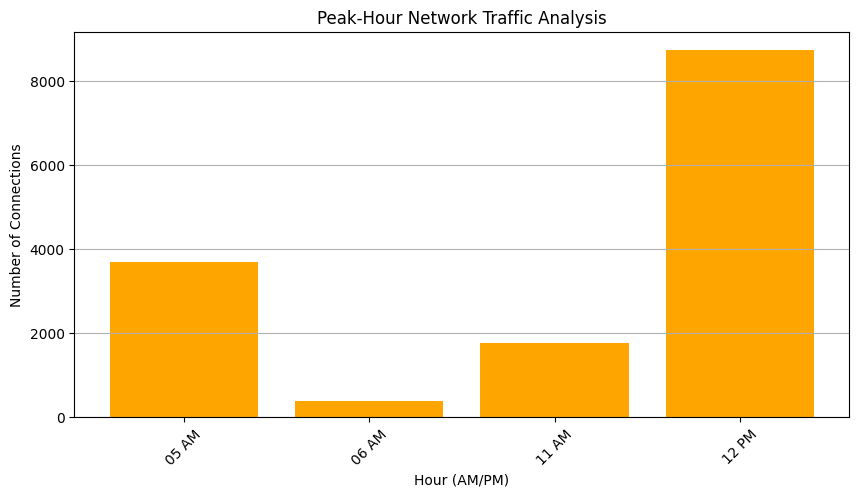

In [10]:
# Convert 'Time' to datetime format
combined_df["Time"] = pd.to_datetime(combined_df["Time"])

# Extract hour (in 12-hour format with AM/PM)
combined_df["Hour_AMPM"] = combined_df["Time"].dt.strftime("%I %p")

# Count occurrences of each hour
hourly_traffic = combined_df["Hour_AMPM"].value_counts().sort_index()

# Plot the traffic by hour
plt.figure(figsize=(10, 5))
plt.bar(hourly_traffic.index, hourly_traffic.values, color="orange")
plt.xlabel("Hour (AM/PM)")
plt.ylabel("Number of Connections")
plt.title("Peak-Hour Network Traffic Analysis")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()
